In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('../data/cleaned_jetblue_df.csv')
print(data.columns)

Index(['searchDate', 'searchDayOfWeek', 'route', 'flightDate',
       'flightDayOfWeek', 'startingAirport', 'destinationAirport',
       'travelDuration', 'elapsedDays', 'isBasicEconomy', 'isRefundable',
       'isNonStop', 'baseFare', 'totalFare', 'seatsRemaining',
       'totalTravelDistance', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
       'segmentsDepartureAirportCode', 'segmentsAirlineName',
       'segmentsDurationInSeconds', 'segmentsCabinCode', 'departureTime',
       'arrivalTime', 'departureCategory', 'arrivalCategory', 'searchDateInt',
       'flightDateInt', 'daysLeft', 'numStops'],
      dtype='object')


In [3]:
data.shape

(3949471, 31)

In [2]:
data.head()

,searchDate,searchDayOfWeek,route,flightDate,flightDayOfWeek,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,...,segmentsDurationInSeconds,segmentsCabinCode,departureTime,arrivalTime,departureCategory,arrivalCategory,searchDateInt,flightDateInt,daysLeft,numStops
0,2022-04-16,Saturday,ATL|EWR,2022-04-17,Sunday,ATL,EWR,PT2H9M,0,False,...,7740,coach,07:30:00,09:39:00,Morning,Morning,20220416,20220417,1,0
1,2022-04-16,Saturday,ATL|JFK,2022-04-17,Sunday,ATL,JFK,PT2H15M,0,False,...,8100,coach,09:00:00,11:15:00,Morning,Noon,20220416,20220417,1,0
2,2022-04-16,Saturday,ATL|JFK,2022-04-17,Sunday,ATL,JFK,PT2H23M,0,False,...,8580,coach,18:50:00,21:13:00,Afternoon,Evening,20220416,20220417,1,0
3,2022-04-16,Saturday,ATL|LGA,2022-04-17,Sunday,ATL,LGA,PT2H16M,0,False,...,8160,coach,12:03:00,14:19:00,Noon,Noon,20220416,20220417,1,0
4,2022-04-16,Saturday,ATL|LGA,2022-04-17,Sunday,ATL,LGA,PT2H19M,0,False,...,8340,coach,10:40:00,12:59:00,Morning,Noon,20220416,20220417,1,0


In [39]:
filtered_data = data[data['totalFare'] <= 1500]
filtered_data.shape


(3929953, 31)

##### train test split

In [40]:
X = filtered_data[['elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'searchDateInt', 'flightDateInt', 'daysLeft', 'numStops']]
y = filtered_data['totalFare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=20241216)

model = RandomForestRegressor(n_estimators=100, random_state=20241216)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4269.583590569921


In [13]:
data['flightDate'] = pd.to_datetime(data['flightDate'])

earliest_date = data['flightDate'].min()
latest_date = data['flightDate'].max()

print(f"Earliest flight date: {earliest_date}")
print(f"Latest flight date: {latest_date}")


Earliest flight date: 2022-04-17 00:00:00
Latest flight date: 2022-11-19 00:00:00


##### comparing the test model predictions to the actual data

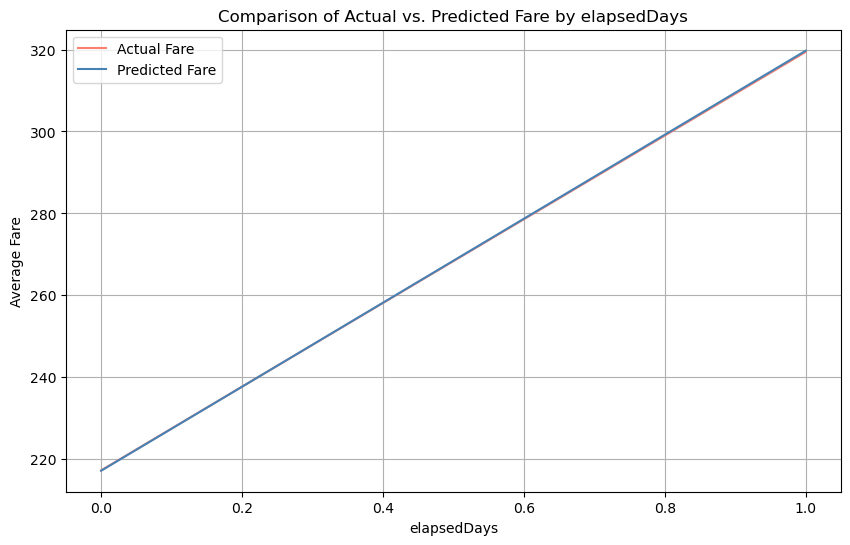

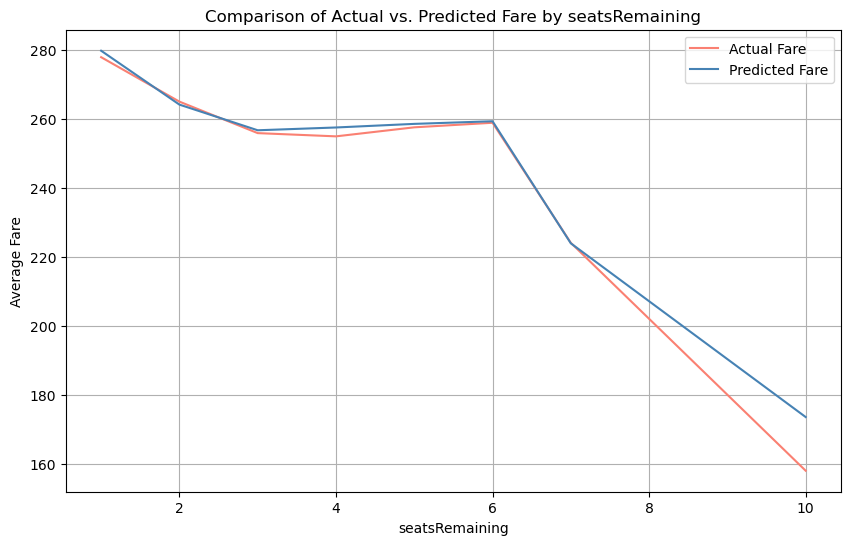

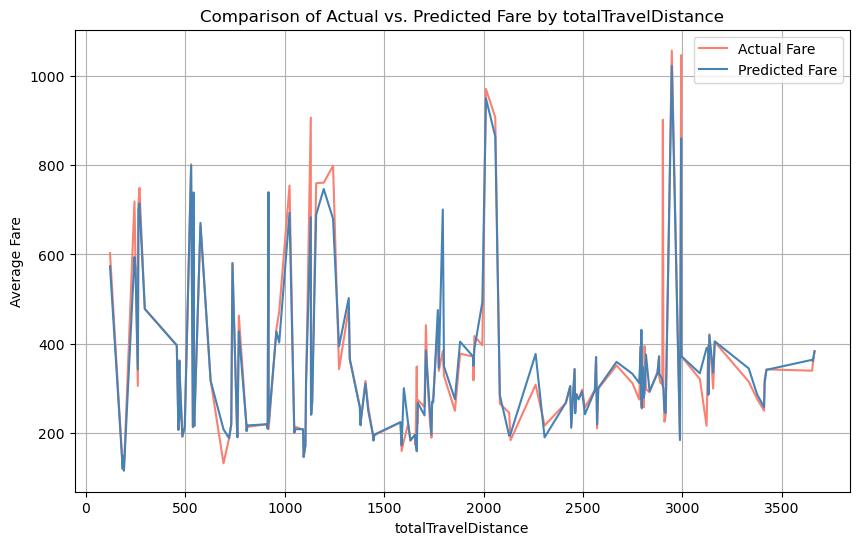

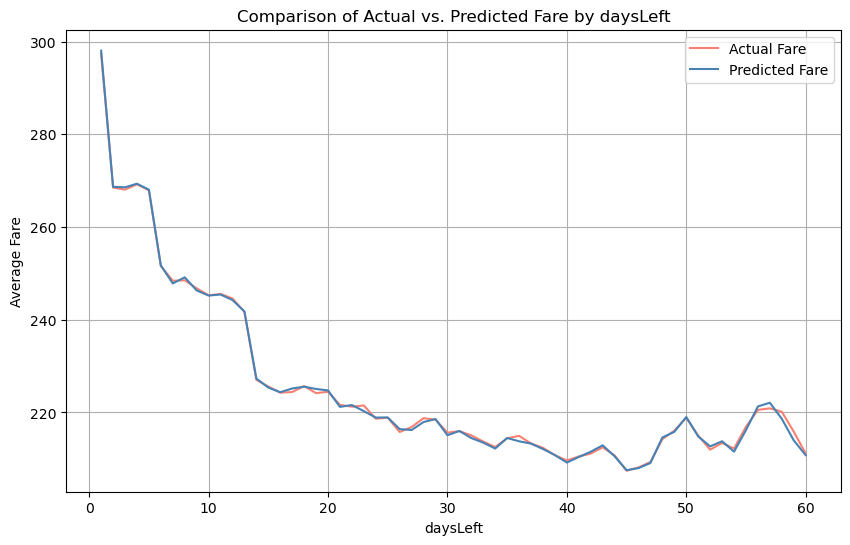

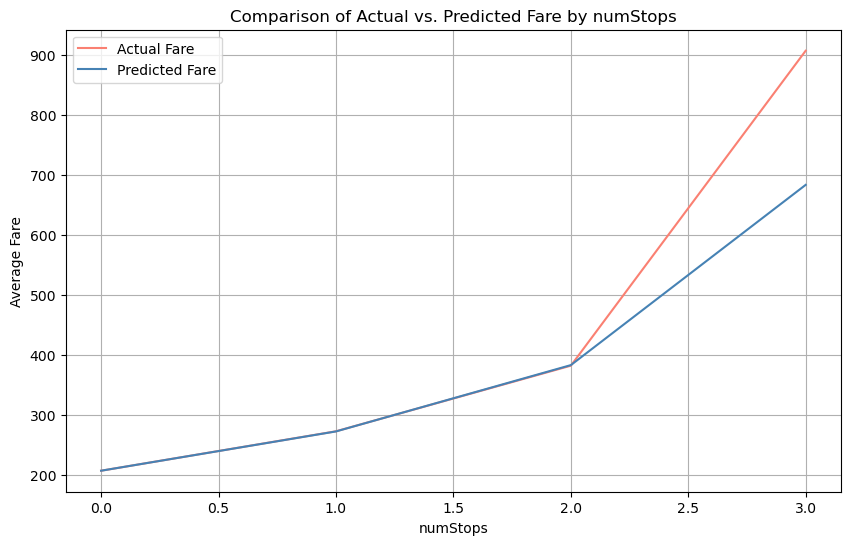

In [41]:
results = X_test.copy()
results['Actual Total Fare'] = y_test
results['Predicted Total Fare'] = y_pred


features = ['elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'daysLeft', 'numStops']

for feature in features:
    avg_results = results.groupby(feature).mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(avg_results[feature], avg_results['Actual Total Fare'], label='Actual Fare', color='salmon')
    plt.plot(avg_results[feature], avg_results['Predicted Total Fare'], label='Predicted Fare', color='steelblue')
    plt.xlabel(feature)
    plt.ylabel("Average Fare")
    plt.title(f"Comparison of Actual vs. Predicted Fare by {feature}")
    plt.legend()
    plt.grid(True)
    plt.show()


##### correlation matrix of the features selected to total fare

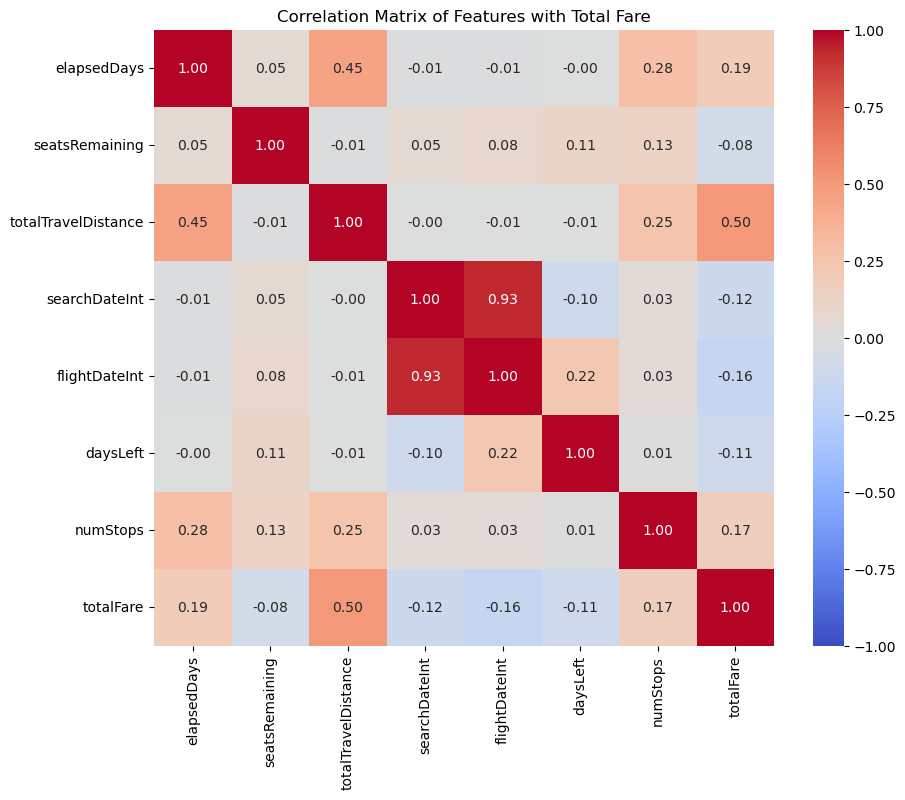

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into one DataFrame
features = ['elapsedDays', 'seatsRemaining', 'totalTravelDistance', 'searchDateInt', 'flightDateInt', 'daysLeft', 'numStops']
data_corr = data[features + ['totalFare']]  # Add the target variable

# Compute the correlation matrix
corr_matrix = data_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features with Total Fare")
plt.show()

In [30]:
# Correlation of each feature with totalFare
correlation_with_target = corr_matrix['totalFare'].sort_values(ascending=False)
print(correlation_with_target)


totalFare              1.000000
totalTravelDistance    0.504737
elapsedDays            0.189251
numStops               0.167087
seatsRemaining        -0.082565
daysLeft              -0.108158
searchDateInt         -0.122480
flightDateInt         -0.158223
Name: totalFare, dtype: float64


## outlier stuff

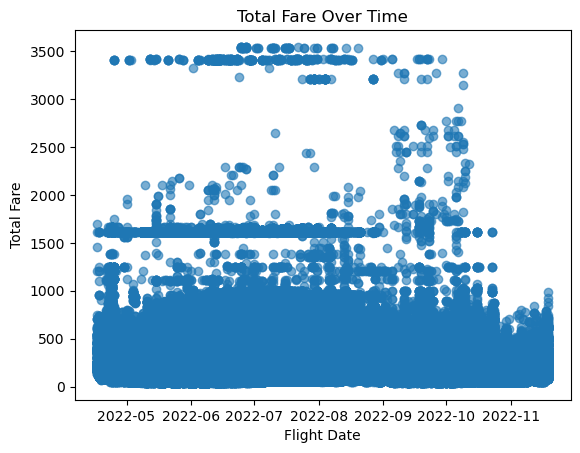

In [25]:
import matplotlib.pyplot as plt

# Ensure the flightDate column is in datetime format
data['flightDate'] = pd.to_datetime(data['flightDate'])

# Plot all fares against flight dates
plt.scatter(data['flightDate'], data['totalFare'], alpha=0.6)
plt.title('Total Fare Over Time')
plt.xlabel('Flight Date')
plt.ylabel('Total Fare')
plt.show()


In [41]:
# Total number of data points
total_data_points = data.shape[0]

# Number of data points where totalFare > 1500
above_1500_count = data[data['totalFare'] > 1500].shape[0]

# Percentage of data points above 1500
percentage_above_1500 = (above_1500_count / total_data_points) * 100

print(f"Total number of data points: {total_data_points}")
print(f"Number of data points with totalFare above 1500: {above_1500_count}")
print(f"Percentage of data points above 1500: {percentage_above_1500:.2f}%")


Total number of data points: 3949480
Number of data points with totalFare above 1500: 19518
Percentage of data points above 1500: 0.49%


##### it looks like the totalFare is mainly under 1500 dollars, if we wanted to have a cutoff point i think 1500 is a good place, either that or 1000

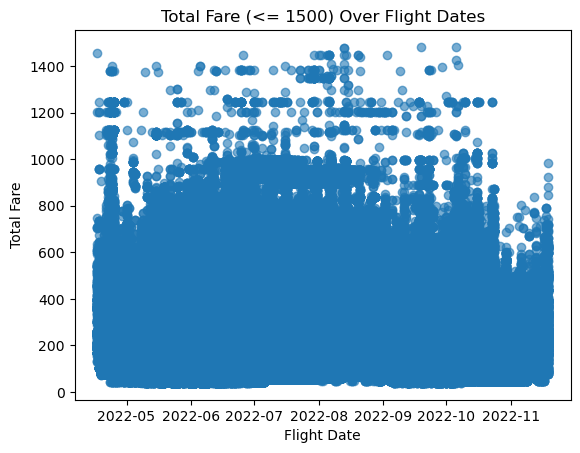

In [42]:
import matplotlib.pyplot as plt

# Filter data to include only rows where totalFare <= 1500
filtered_data = data[data['totalFare'] <= 1500]

# Plot the filtered data
plt.scatter(filtered_data['flightDate'], filtered_data['totalFare'], alpha=0.6)
plt.title('Total Fare (<= 1500) Over Flight Dates')
plt.xlabel('Flight Date')
plt.ylabel('Total Fare')
plt.show()


##### pretty even spread of data after cutting totalFare off at 1500, could go even further at 1000 but i think 1500 is decent

In [48]:
def get_best_purchase_date_with_actual_fares(input_date, data, model, X, y_test, y_pred):
    # Ensure input_date and flightDate are in datetime format
    input_date = pd.to_datetime(input_date)
    data['flightDate'] = pd.to_datetime(data['flightDate'])
    
    # Filter dataset for the specified date and startingAirport = JFK
    flights_on_date = data[(data['flightDate'] == input_date) & (data['startingAirport'] == 'JFK')]
    
    if flights_on_date.empty:
        return f"No flights found on {input_date.date()} from JFK."
    
    # Get the unique routes for flights on the input date
    available_routes = flights_on_date['route'].unique()
    print(f"Available routes from JFK on {input_date.date()}:")
    for i, route in enumerate(available_routes, 1):
        print(f"{i}. {route}")
    
    # Ask the user to choose a route
    try:
        route_choice = int(input("Enter the number corresponding to the route: ")) - 1
        if route_choice < 0 or route_choice >= len(available_routes):
            return "Invalid route choice. Please try again."
    except ValueError:
        return "Invalid input. Please enter a number."
    
    chosen_route = available_routes[route_choice]
    
    # Filter dataset for the chosen route on the input date
    flights_on_date_and_route = flights_on_date[flights_on_date['route'] == chosen_route]
    if flights_on_date_and_route.empty:
        return f"No flights found on {input_date.date()} for route {chosen_route}."
    
    # Get the actual fare for the route on the flight date (input date)
    actual_fare_on_input_date = flights_on_date_and_route['totalFare'].iloc[0]
    
    # Add predictions to the test dataset
    X_test_with_pred = X.copy()
    X_test_with_pred['PredictedFare'] = y_pred
    X_test_with_pred['ActualFare'] = y_test.values
    X_test_with_pred['flightDate'] = data['flightDate']
    X_test_with_pred['route'] = data['route']
    
    # Filter predictions for the chosen route and only dates before the input date
    predictions_for_route_before_date = X_test_with_pred[
        (X_test_with_pred['route'] == chosen_route) & 
        (X_test_with_pred['flightDate'] < input_date)
    ]
    
    if predictions_for_route_before_date.empty:
        return f"No predicted fares available for route {chosen_route} before {input_date.date()}."
    
    # Find the best purchase date (date with the lowest predicted fare)
    best_purchase_index = predictions_for_route_before_date['PredictedFare'].idxmin()
    best_purchase_date = predictions_for_route_before_date.loc[best_purchase_index, 'flightDate']
    lowest_predicted_fare = predictions_for_route_before_date.loc[best_purchase_index, 'PredictedFare']
    
    # Attempt to get the actual fare on the best purchase date
    actual_fare_on_best_purchase_date = None
    best_purchase_data = data[
        (data['flightDate'] == best_purchase_date) & (data['route'] == chosen_route)
    ]
    if not best_purchase_data.empty:
        actual_fare_on_best_purchase_date = best_purchase_data['totalFare'].iloc[0]
    
    return {
        "Flight Date": input_date.date(),
        "Chosen Route": chosen_route,
        "Actual Fare on Flight Date": actual_fare_on_input_date,
        "Best Purchase Date": best_purchase_date.date(),
        "Lowest Predicted Fare on Best Purchase Date": lowest_predicted_fare,
        "Actual Fare on Best Purchase Date": actual_fare_on_best_purchase_date
    }

# Example usage
input_date = input("Enter the flight date (YYYY-MM-DD): ")
fare_info = get_best_purchase_date_with_actual_fares(input_date, data, model, X_test, y_test, y_pred)
print(fare_info)


Available routes from JFK on 2022-06-23:
1. JFK|ATL
2. JFK|BOS
3. JFK|CLT
4. JFK|DEN
5. JFK|DFW
6. JFK|DTW
7. JFK|LAX
8. JFK|MIA
9. JFK|ORD
10. JFK|PHL
11. JFK|SFO
{'Flight Date': datetime.date(2022, 6, 23), 'Chosen Route': 'JFK|DTW', 'Actual Fare on Flight Date': 182.6, 'Best Purchase Date': datetime.date(2022, 5, 11), 'Lowest Predicted Fare on Best Purchase Date': 92.60000000000016, 'Actual Fare on Best Purchase Date': 92.6}


In [11]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

print("Numerical columns:", numerical_columns)
print(len(numerical_columns))

Numerical columns: ['elapsedDays', 'baseFare', 'totalFare', 'seatsRemaining', 'totalTravelDistance', 'searchDateInt', 'flightDateInt', 'daysLeft', 'numStops']
9


In [ ]:
import pandas as pd
data_types = data.dtypes
categorical_columns = data_types[data_types == 'object'].index.tolist()
categorical_columns_explicit = data_types[data_types == 'category'].index.tolist()
categorical_columns = categorical_columns + categorical_columns_explicit

print("Categorical columns:", categorical_columns)
print(len(categorical_columns))


Categorical columns: ['searchDate', 'searchDayOfWeek', 'route', 'flightDate', 'flightDayOfWeek', 'startingAirport', 'destinationAirport', 'travelDuration', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsDurationInSeconds', 'segmentsCabinCode', 'departureTime', 'arrivalTime', 'departureCategory', 'arrivalCategory']
19
